안녕하세요! 데이크루 1기로 활동 중인 sssssun입니다!

지난주에 sklearn을 활용하여 머신러닝의 분류, 회귀 분석 알고리즘을 공부해보았는데요.

sklearn을 좀더 공부하다보니, 머신러닝 모델의 성능과 정확도를 높이기 위해 데이터 스케일링 과정을 포함한다는 것을 알게 되었습니다.

따라서 이번 포스팅은 sklearn을 활용한 데이터 스케일링(Data Scaling)에 대해 공부한 내용을 다루어보았습니다.

처음 배워보는 입장에서 포스팅을 쓰기 때문에 오류나 팁 등이 있다면 언제나 적극적으로 알려주시면 감사하겠습니다😇

# **데이터 스케일링(Data Scaling)**

데이터 스케일링이란 데이터 전처리 과정 중의 하나입니다.

 피처(feature)들마다 데이터값의 범위가 다 제각각이기 때문에 범위 차이가 클 경우 데이터를 갖고 모델을 학습할 때 0으로 수렴하거나 무한으로 발산할 수 있습니다.

 즉, 머신러닝이

따라서 데이터 스케일링을 통해 **모든 피처들의 데이터 분포나 범위를 동일하게 조정**해줄 수 있습니다.

저는 sklearn의 5가지 스케일링 방법을 소개하겠습니다.

sklearn의 breast cancer dataset을 활용하여 데이터 스케일링을 연습해보겠습니다.

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

데이터셋을 dataframe 형태로 만들어서 어떤 피처들을 갖고 있는지 확인해보겠습니다.

새로 추가한 target열을 보니, 분류 알고리즘을 활용해야하네요.

In [58]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


라이브러리와 데이터셋을 import 해주었습니다.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('모델의 정확도 :', round(dtc.score(X_test, y_test), 4))

모델의 정확도 : 0.886


모델을 만들고 학습과 테스트를 거쳐 정확도를 출력해보았습니다.

모델의 정확도는 0.886 정도이네요.

이제 스케일링 방법마다 데이터를 스케일링하고, 정확도를 출력해보겠습니다.

### **(1) StandardScaler()**

StandardScaler는 모든 피처들을 **평균이 0, 분산이 1**인 정규분포를 갖도록 만들어줍니다.

즉, 표준화해주는 방법이죠.

이 방법의 경우 데이터 내에 이상치가 있다면 데이터의 평균과 분산에 크게 영향을 주기 때문에 스케일링 방법으로 적절하지 않습니다.



sklearn 으로 데이터 스케일링을 할 경우, 훈련용 데이터셋과 테스트용 데이터셋에 각각 다른 과정이 필요합니다.

훈련용 데이터셋은 fit 메서드를 적용시킨 후 transform 해주어야 하고, 테스트용 데이터셋에는 transform 을 적용시켜주면 됩니다.

StandardScaler를 import 해주고, 데이터 스케일링을 진행해보았습니다.

In [20]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9123


모델의 정확도가 상승하였네요.

In [112]:
X_train

array([[1.916e+01, 2.660e+01, 1.262e+02, ..., 1.872e-01, 3.258e-01,
        9.720e-02],
       [1.831e+01, 1.858e+01, 1.186e+02, ..., 1.571e-01, 3.206e-01,
        6.938e-02],
       [1.404e+01, 1.598e+01, 8.978e+01, ..., 7.453e-02, 2.725e-01,
        7.234e-02],
       ...,
       [1.795e+01, 2.001e+01, 1.142e+02, ..., 1.185e-01, 4.882e-01,
        6.111e-02],
       [1.955e+01, 2.877e+01, 1.336e+02, ..., 1.941e-01, 2.818e-01,
        1.005e-01],
       [1.152e+01, 1.493e+01, 7.387e+01, ..., 9.608e-02, 2.664e-01,
        7.809e-02]])

In [113]:
X_train_scaled

array([[ 1.40381088,  1.79283426,  1.37960065, ...,  1.044121  ,
         0.52295995,  0.64990763],
       [ 1.16565505, -0.14461158,  1.07121375, ...,  0.5940779 ,
         0.44153782, -0.85281516],
       [-0.0307278 , -0.77271123, -0.09822185, ..., -0.64047556,
        -0.31161687, -0.69292805],
       ...,
       [ 1.06478904,  0.20084323,  0.89267396, ...,  0.01694621,
         3.06583565, -1.29952679],
       [ 1.51308238,  2.3170559 ,  1.67987211, ...,  1.14728703,
        -0.16599653,  0.82816016],
       [-0.73678981, -1.02636686, -0.74380549, ..., -0.31826862,
        -0.40713129, -0.38233653]])

데이터를 직접 불러와서 보았을 때, 데이터값의 범위가 변화한 것을 볼 수 있습니다.

숫자로 보니 직관적이지 않아 그래프로 그려보겠습니다.

데이터셋은 numpy array 이기 때문에 shape을 열 1개로 바꾸어서 플로팅해주겠습니다.

In [28]:
X_train_scaled.shape

(455, 30)

In [21]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)
X_train_data = X_train.reshape(13650,1)

먼저, 스케일링 전의 훈련 데이터셋의 분포를 그려보았습니다.

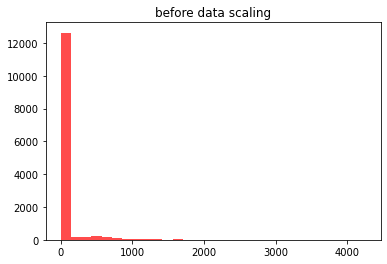

In [23]:
plt.hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
plt.title('before data scaling')
plt.show()

다음으로 스케일링 후의 데이터로 히스토그램을 그려보았습니다.

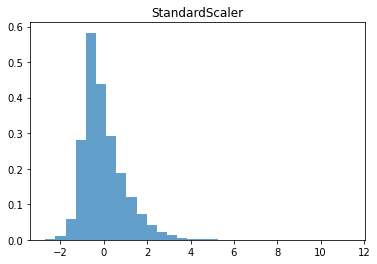

In [34]:
plt.hist(X_train_scaled_ss, bins=30, alpha = 0.7, density = True)
plt.title('StandardScaler')
plt.show()

그래프가 0을 중심으로 정규 분포의 모양을 가지는 것을 확인할 수 있습니다.

### **(2) MinMaxScaler()**

MinMaxScaler는 모든 피처들이 **0과 1사이**의 데이터값을 갖도록 만들어줍니다.

즉, 피처별로 최솟값은 0이 되고, 최댓값은 1이 되는 것이죠.

데이터가 2차원인 겅우, 모든 데이터는 x, y 축의 0과 1 사이에 존재하게 됩니다.

이 방법 또한 이상치가 존재한다면, 이상치가 극값이 되어 데이터가 아주 좁은 범위에 분포하게 되기 때문에 스케일링 방법으로 적절하지 않습니다.

In [32]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9035


마찬가지로 모델의 정확도가 상승하였습니다.

In [115]:
X_train_scaled

array([[0.56168275, 0.7081761 , 0.55664674, ..., 0.64329897, 0.33372758,
        0.27653155],
       [0.52005485, 0.37190776, 0.50256191, ..., 0.53986254, 0.32347723,
        0.09405746],
       [0.31093589, 0.26289308, 0.29746655, ..., 0.25611684, 0.22866154,
        0.11347239],
       ...,
       [0.50242421, 0.43186583, 0.47124964, ..., 0.40721649, 0.65385374,
        0.03981372],
       [0.5807826 , 0.79916143, 0.60930828, ..., 0.66701031, 0.24699389,
        0.29817657],
       [0.18752143, 0.21886792, 0.18424424, ..., 0.33017182, 0.2166371 ,
        0.1511872 ]])

데이터를 직접 보면, 모든 데이터가 0과 1사이에서 데이터값을 가지네요.

위와 마찬가지로 array 크기를 변경하여 플로팅해보았습니다.

In [33]:
X_train_scaled_mms = X_train_scaled.reshape(13650,1)

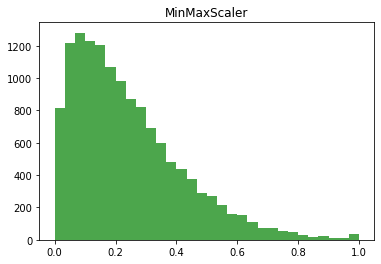

In [36]:
plt.hist(X_train_scaled_mms, bins=30, color='green', alpha = 0.7)
plt.title('MinMaxScaler')
plt.show()

스케일링 후의 데이터 값들이 0과 1사이에 분포되어있는 것을 볼 수 있습니다.

### **(3) MaxAbsScaler()**

MaxAbsScaler는 MinMaxScaler와 비슷한데요!

방법의 이름에서도 알 수 있듯이 모든 피처들의 **절댓값이 0과 1 사이**에 놓이도록 만들어줍니다.

즉, 0을 기준으로 절댓값이 가장 큰 수가 1또는 -1의 값을 가지게 됩니다.

마찬가지로, 이상치의 영향을 크게 받기 때문에 이상치가 존재할 경우 이 방법은 적절하지 않습니다.

In [37]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
mas.fit(X_train)
X_train_scaled = mas.transform(X_train)
X_test_scaled = mas.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9123


마찬가지로 스케일링을 통해 모델의 정확도가 상승하였습니다.

In [38]:
X_train_scaled

array([[0.68160797, 0.79261025, 0.66949602, ..., 0.64329897, 0.49081049,
        0.46843373],
       [0.65136962, 0.55363528, 0.62917772, ..., 0.53986254, 0.4829768 ,
        0.33436145],
       [0.49946638, 0.4761621 , 0.47628647, ..., 0.25611684, 0.41051522,
        0.34862651],
       ...,
       [0.63856279, 0.59624553, 0.60583554, ..., 0.40721649, 0.73546249,
        0.29450602],
       [0.69548203, 0.85727056, 0.70875332, ..., 0.66701031, 0.42452546,
        0.48433735],
       [0.40981857, 0.44487485, 0.39188329, ..., 0.33017182, 0.4013257 ,
        0.37633735]])

데이터를 직접 보니 모든 데이터가 -1과 1사이의 범위에 존재하네요. 

In [42]:
X_train_scaled_mas = X_train_scaled.reshape(13650,1)

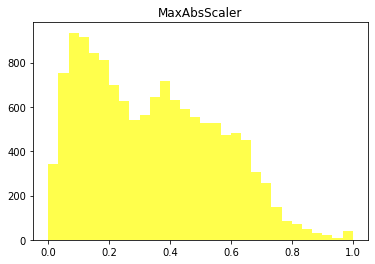

In [43]:
plt.hist(X_train_scaled_mas, bins=30, color='yellow', alpha = 0.7)
plt.title('MaxAbsScaler')
plt.show()

그래프를 그려보았을 때, MinMaxScaler보다 퍼져있는 모양을 볼 수 있네요.

데이터가 모두 양수이기 때문에 0과 1사이의 범위에만 데이터가 존재하는 것 같습니다.

### **(4) RobustScaler()**

RobustScaler는 StandardScaler와 비슷합니다.

다만, StandardScaler는 평균과 분산을 사용했지만 RobustScaler는 **중간값**(median)과 **사분위값**(quartile)을 사용합니다.

따라서, 이상치의 영향을 최소화할 수 있겠습니다.

StandardScaler와 비교하였을 때, RobustScaler를 활용하면 표준화 후 데이터가 더 넓게 분포해있습니다.

In [48]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9123


마찬가지로 정확도가 상승했습니다.

In [49]:
X_train_scaled

array([[ 1.36170213,  1.42597639,  1.34367099, ...,  0.83828187,
         0.63836018,  0.78497281],
       [ 1.1607565 , -0.03088102,  1.08747682, ...,  0.54038005,
         0.56222548, -0.59021256],
       [ 0.15130024, -0.50317893,  0.11596157, ..., -0.27682106,
        -0.1420205 , -0.44389521],
       ...,
       [ 1.07565012,  0.22888283,  0.93915389, ...,  0.15835313,
         3.01610542, -0.99901137],
       [ 1.45390071,  1.82016349,  1.59312321, ...,  0.90657165,
        -0.00585652,  0.94809689],
       [-0.44444444, -0.69391462, -0.42036069, ..., -0.06353919,
        -0.23133236, -0.15966387]])

In [50]:
X_train_scaled_rbs = X_train_scaled.reshape(13650,1)

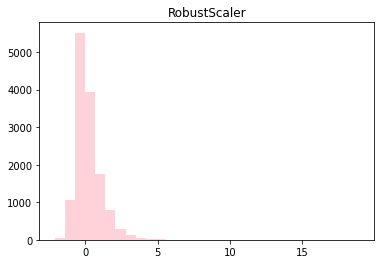

In [51]:
plt.hist(X_train_scaled_rbs, bins=30, color='pink', alpha = 0.7)
plt.title('RobustScaler')
plt.show()

위에서 말한대로, 표준화되었기 때문에 모양이 StandardScaler와 비슷합니다.

### **(5) Normalizer()**

앞의 4가지 방법은 각 피처(feature)의 통계치를 이용합니다. 

즉, 열(columns)를 대상으로 합니다.

그러나 Normalizer 의 경우 각 **행(row)마다 정규화**가 진행됩니다.

이는 한 행의 모든 피처들 사이의 유클리드 거리가 1이 되도록 데이터값을 만들어줍니다.

이렇게 하면 좀 더 빠르게 학습할 수 있고 과대적합 확률을 낮출 수 있다고 합니다..


In [52]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
X_train_scaled = norm.fit_transform(X_train)
X_test_scaled = norm.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9298


모델의 정확도가 가장 상승하였습니다.

In [53]:
X_train_scaled

array([[9.22211661e-03, 1.28031473e-02, 6.07427514e-02, ...,
        9.01033522e-05, 1.56814488e-04, 4.67844329e-05],
       [1.03861667e-02, 1.05393215e-02, 6.72746788e-02, ...,
        8.91134236e-05, 1.81857184e-04, 3.93551199e-05],
       [1.43548748e-02, 1.63383831e-02, 9.17934942e-02, ...,
        7.62014828e-05, 2.78611352e-04, 7.39623677e-05],
       ...,
       [1.11556685e-02, 1.24359291e-02, 7.09736683e-02, ...,
        7.36460568e-05, 3.03409324e-04, 3.79789918e-05],
       [8.54812786e-03, 1.25795211e-02, 5.84158507e-02, ...,
        8.48691364e-05, 1.23215470e-04, 4.39430614e-05],
       [1.77702285e-02, 2.30303396e-02, 1.13948505e-01, ...,
        1.48208642e-04, 4.10936535e-04, 1.20458086e-04]])

In [54]:
X_train_scaled_norm = X_train_scaled.reshape(13650,1)

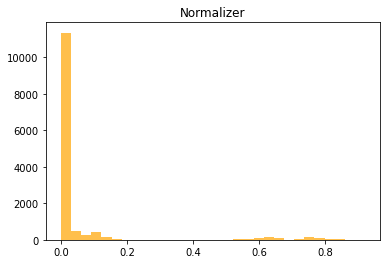

In [56]:
plt.hist(X_train_scaled_norm, bins=30, color='orange ', alpha = 0.7)
plt.title('Normalizer')
plt.show()

데이터를 그려보았을 때, 0 근처에서 데이터값이 다 모여있는 것을 확인할 수 있네요.

x축의 범위도 가장 작습니다.

이렇게 오늘은 데이터 스케일링의 5가지 방법에 대해 설명해보았습니다.

유방암 데이터셋을 활용한 SVC 분류 알고리즘 모델에서는 Normalizer 방법에서 모델의 정확도가 가장 상승했는데요!

dataset과 사용하는 알고리즘에 따라 가장 적절한 스케일링 방법이 다르다고 합니다.

데이터 스케일링 과정을 거친다면 더 정확한 머신러닝을 할 수 있을 것 같아요.

읽어주셔서 감사합니다 :)